# Understanding Relations between Variables

In [1]:
import pandas as pd
import seaborn as sns # Import seaborn and matplotlib for visualizing
import matplotlib.pyplot as plt
import numpy as np

## Visualizing variables

Before you can run any statistical models, it's usually a good idea to visualize your dataset. 

Let's first start with the tips dataset that you can find in the seaborn package

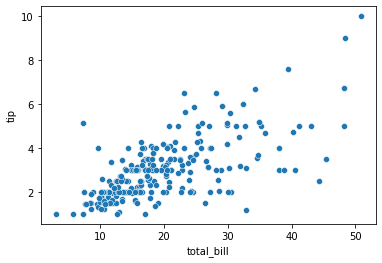

In [2]:
tipdata = sns.load_dataset('tips')
sns.scatterplot(x="total_bill", y="tip", 
                data=tipdata)

plt.show() 

In [3]:
tipdata.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Drawing trend line
Now, let's draw a trend line calculated using linear regression. 

You can use seaborn's `regplot` for this: https://seaborn.pydata.org/generated/seaborn.regplot.html

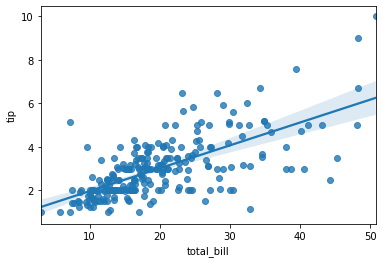

In [4]:
sns.regplot(x="total_bill", y="tip", 
            data=tipdata)
# Show the plot
plt.show()

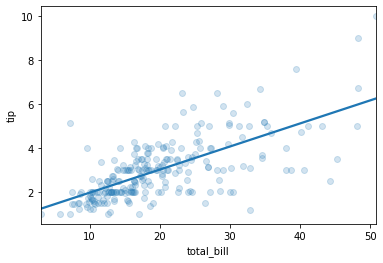

In [6]:
sns.regplot(x="total_bill", y="tip", 
            data=tipdata,
           ci = None,
           scatter_kws={'alpha':0.2})
# Show the plot
plt.show()

#### Visualizing some more variables

Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

In [7]:
# let's load the data as a pandas dataframe
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

In [9]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


**TODO**: Your task is to first visualize the two numeric variables before starting to model anything

Using taiwan_real_estate, draw a scatter plot of `price_twd_msq` (y-axis) versus `n_convenience` (x-axis).

Checkout seaborn's `scatterplot`: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

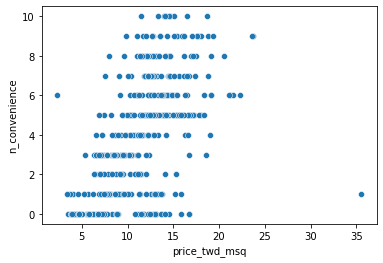

In [13]:
# Your code below. Fill it in
# Draw the scatter plot
sns.scatterplot(data=taiwan_real_estate, x="price_twd_msq", y="n_convenience")

# Show the plot
plt.show()

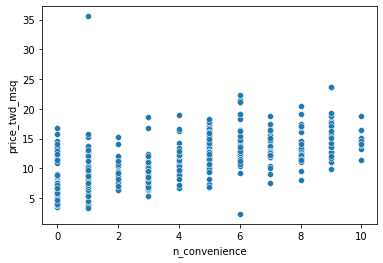

In [14]:
# Your code below. Filled in
# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Plot it
plt.show()

### Drawing trend line
Now, let's draw a trend line calculated using linear regression. 

You can use seaborn's `regplot` for this: https://seaborn.pydata.org/generated/seaborn.regplot.html

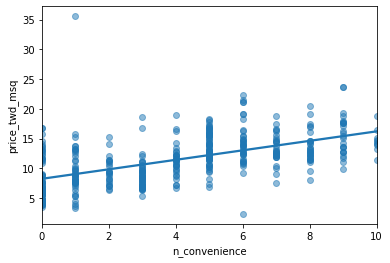

In [17]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience 
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None, #omitting confidence interval here
            scatter_kws={'alpha': 0.5}) #The scatter_kws argument makes the data points 50% transparent.

# Show the plot
plt.show()

<span class="girk">Lab part 2</span>

### Linear regression with statsmodel

While `sns.regplot()` can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables.

Let's use statsmodel to run your regression model.

Read statsmodel documentation for linear regression:
* https://www.statsmodels.org/stable/index.html
* https://www.statsmodels.org/stable/regression.html

**STEPS**
* Import the `ols()` function from the statsmodels.formula.api package.
* Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset. Name it mdl_price_vs_conv.
* Fit the model.
* Print the parameters of the fitted model.

In [18]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Extract and Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


#### Interpreting the intercept

The model had an Intercept coefficient of 8.2242. What does this mean?

Possible Answers

* a). On average, houses had a price of 8.2242 TWD per square meter.
* b). On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.
* c). The minimum house price was 8.2242 TWD per square meter.
* d). The minimum house price with zero convenience stores nearby was 8.2242 TWD per square meter.
* e). The intercept tells you nothing about house prices.


**Your response below**

Correct response: (b).


#### Interpreting the slope

The model had an n_convenience coefficient of 0.7981. What does this mean?

Possible Answers

* a). If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.
* b). If you increase the house price by 0.7981 TWD per square meter, then the expected increase in the number of nearby convenience stores is one.
* c). If you increase the number of nearby convenience stores by 0.7981, then the expected increase in house price is one TWD per square meter.
* d). If you increase the house price by one TWD per square meter, then the expected increase in the number of nearby convenience stores is 0.7981.
* e). The n_convenience coefficient tells you nothing about house prices.


**Your response below**

Correct response: (a).

<span class="girk">Lab part 3</span>

## Working with model object

**fittedvalues** attributes: predictions on the original dataset 

In [19]:
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [20]:
taiwan_real_estate.shape

(414, 4)

In [21]:
explanatory_data = taiwan_real_estate["n_convenience"]
print(mdl_price_vs_conv.predict(explanatory_data))

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


#### Residuals
actual response value - predicted response values.

In [22]:
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [23]:
# Inspect the results
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           3.41e-37
Time:                        09:52:10   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

### Predicting

You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use `.predict()`, but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

the predicted value is just the intercept plus the slope times the explanatory variable.

response = intercept + slope * explanatory

**TODO**
* Get the coefficients of mdl_price_vs_conv, assigning to coeffs.
* Get the intercept, which is the first element of coeffs, assigning to intercept.
* Get the slope, which is the second element of coeffs, assigning to slope.
* Manually predict price_twd_msq using the intercept, slope, and explanatory_data.
* Run the code to compare your manually calculated predictions to the results from .predict().

**Fill in the code below**

In [24]:
# Solution
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
predictions_auto=mdl_price_vs_conv.predict(explanatory_data)
print(predictions_auto)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Name: n_convenience, Length: 414, dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [25]:
predictions_auto

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [26]:
price_twd_msq.head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
Name: n_convenience, dtype: float64

### Model fit

In [27]:
# summary of the model
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           3.41e-37
Time:                        09:56:51   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

**Finding the coefficient of determination**

In [28]:
# r-squared attribute
print(mdl_price_vs_conv.rsquared)

0.32604660851305045


**Finding the Residual standard error**

In [29]:
# calculating the RSE

#first extract the mse and then take square root.
mse = mdl_price_vs_conv.mse_resid

rse = np.sqrt(mse)
print(rse) #rse has the same unit as the response variable.

3.383887521343046


# Exercise

Practice with Reddit data. The first two bullets are solved for you

* Load the reddit data you had used in a previous lab 'reddit_2007_author.csv'
* Inspect the data 
* come up with a research question that you can answer with regression modeling. E.g.: predicting num_subs based on karma. *Hint: check the columns of the data-frame to see what all is available and what could be serve as a good question*
* Build a linear regression model with a choice of a response variable and explanatory variables to answer your question.

In [31]:
df = pd.read_csv("reddit_2007_author.csv", header=0)

In [35]:
df.tail()

,author,num_comments,num_subs,karma,controv,gild,verbosity
63653,triumphantbike,13,3,60,0,0,500.692308
63654,woadwarrior,13,1,51,0,0,190.923077
63655,mikemike,13,2,97,0,0,607.307692
63656,cdub,13,4,205,0,0,245.307692
63657,Squarsh,13,1,311,0,0,196.461538


In [33]:
# Create the model object
mdl_numofc_vs_contr = ols("num_comments ~ controv", data=df)

# Fit the model
mdl_numofc_vs_contr = mdl_numofc_vs_contr.fit()

# Extract and Print the parameters of the fitted model
print(mdl_numofc_vs_contr.params)

Intercept    8.280155
controv      9.565098
dtype: float64


In [34]:
print(mdl_numofc_vs_contr.fittedvalues)

0        916.964459
1        180.451918
2          8.280155
3         27.410351
4        476.969954
            ...    
63653      8.280155
63654      8.280155
63655      8.280155
63656      8.280155
63657      8.280155
Length: 63658, dtype: float64


In [37]:
df.shape

(63658, 7)

In [38]:
explanatory_data = df["controv"]
print(mdl_numofc_vs_contr.predict(explanatory_data))

0        916.964459
1        180.451918
2          8.280155
3         27.410351
4        476.969954
            ...    
63653      8.280155
63654      8.280155
63655      8.280155
63656      8.280155
63657      8.280155
Length: 63658, dtype: float64


In [39]:
print(mdl_numofc_vs_contr.resid)

0        275.035541
1        162.548082
2         34.719845
3        110.589649
4        381.030046
            ...    
63653      4.719845
63654      4.719845
63655      4.719845
63656      4.719845
63657      4.719845
Length: 63658, dtype: float64


In [40]:
# Inspect the results
print(mdl_numofc_vs_contr.summary())

                            OLS Regression Results                            
Dep. Variable:           num_comments   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 1.584e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:07:36   Log-Likelihood:            -3.5146e+05
No. Observations:               63658   AIC:                         7.029e+05
Df Residuals:                   63656   BIC:                         7.029e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2802      0.241     34.355      0.0

In [41]:
# r-squared attribute
print(mdl_numofc_vs_contr.rsquared)

0.7132713273877116


In [42]:
# calculating the RSE

#first extract the mse and then take square root.
mse = mdl_numofc_vs_contr.mse_resid

rse = np.sqrt(mse)
print(rse) #rse has the same unit as the response variable.

60.46714468470785
